In [1]:
# Make video (s=1024) at 2 framerate:
#   ffmpeg -f image2 -framerate 2 -i %06d.jpg -s 1024x1024 ./test.avi

# GENERATE JULIA SET IMAGES
using FileIO
using Images
using ImageView
using PyPlot

# Get [-2,2]x[-2,2] complex plane
#  xy = midpoint of canvas in complex plane
#  r = half length of square
#  s = number of pixels
function complexplane(xy,r,s)
    x = linspace(xy[1]-r,xy[1]+r,s)
    y = linspace(xy[2]+r,xy[2]-r,s) # y dim downward
    Z = zeros(Complex,s,s)
    for i = 1:length(y)
        for j = 1:length(x)
            Z[i,j] = x[j] + y[i]*im
        end
    end
    return Z
end

# c: complex constant
# n: polynomial degree, usually = 2
function juliaf(c,n)
    function f(z)
        z.^n + c 
    end
end

function juliaimage(xy,r,s,c)
    f = juliaf(c,2)
    Z = complexplane(xy,r,s)
    # Start image at full intensity, decrement for each iteration
    Tend = 255
    itcount = zeros(size(Z)) + Tend
    for t = 1:Tend
        Z = f(Z)
        subtwo = abs(Z) .< 2
        itcount[subtwo] = itcount[subtwo] - 1
    end
    itcount = itcount./Tend
    return itcount
end

juliaimage (generic function with 1 method)

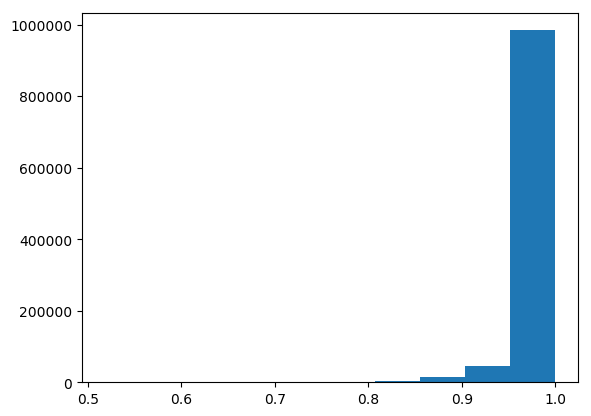

([4.0,0.0,18.0,84.0,310.0,1024.0,4020.0,13518.0,45508.0,984090.0],[0.517647,0.565882,0.614118,0.662353,0.710588,0.758824,0.807059,0.855294,0.903529,0.951765,1.0],Any[PyObject <matplotlib.patches.Rectangle object at 0x320ce1650>,PyObject <matplotlib.patches.Rectangle object at 0x320ce1cd0>,PyObject <matplotlib.patches.Rectangle object at 0x106e93390>,PyObject <matplotlib.patches.Rectangle object at 0x106e93a10>,PyObject <matplotlib.patches.Rectangle object at 0x106e93f10>,PyObject <matplotlib.patches.Rectangle object at 0x106e9f750>,PyObject <matplotlib.patches.Rectangle object at 0x106e9fdd0>,PyObject <matplotlib.patches.Rectangle object at 0x106ead490>,PyObject <matplotlib.patches.Rectangle object at 0x106eadb10>,PyObject <matplotlib.patches.Rectangle object at 0x106ebb1d0>])

In [5]:
xy = (0,0)
r = 2
s = 1024
c = 0.3 + (0.605)*im
jimg = juliaimage(xy,r,s,c)

# Plot histogram of how long each pixel took to diverge
h = PyPlot.plt[:hist](jimg[:])

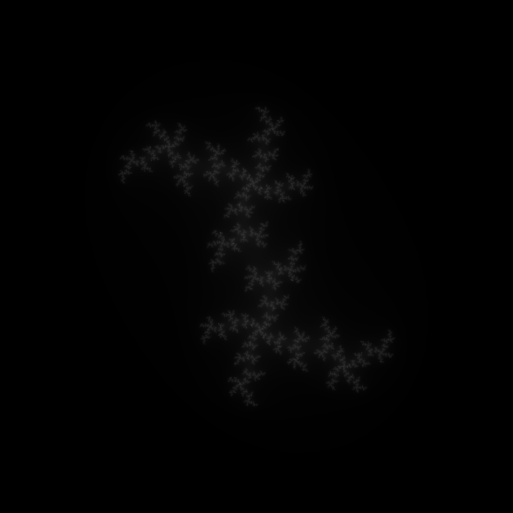

In [6]:
colorview(Gray, jimg)
colorview(Gray, 1-jimg)

In [4]:
# Vary complex component, fix real
function juliavid()
    tic()
    s = 1024
    fr = 10 # number of frames
    count = 0
    re = 0.3
    for c = linspace(-0.5,0.45,fr)
        count = count+1
        jframe = juliaimage((0,0),2,s, re+c*im)
        filename = lpad(string(count),6,"0")
        save("temp/white/$filename.jpg", colorview(Gray,jframe))
        save("temp/black/$filename.jpg", colorview(Gray,1-jframe))
    end
    toc()
end

juliavid (generic function with 1 method)